# Wine Quality Prediction: Logistic Regression vs Random Forest

This project aims to predict wine quality based on physicochemical properties using machine learning models. The main goal is to compare the performance of Logistic Regression and Random Forest classifiers on this dataset.

The dataset used is the Wine Quality Dataset from the UCI Machine Learning Repository, consisting of 11 features and a target variable `quality` ranging from 3 to 8.

We'll go through data preprocessing, exploratory data analysis, model training, and evaluation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Dataset Overview

The dataset includes 11 numeric input features such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, etc., and a target column `quality` representing the wine quality score between 3 and 8.

Let's explore the data to understand distributions, correlations, and class balance.

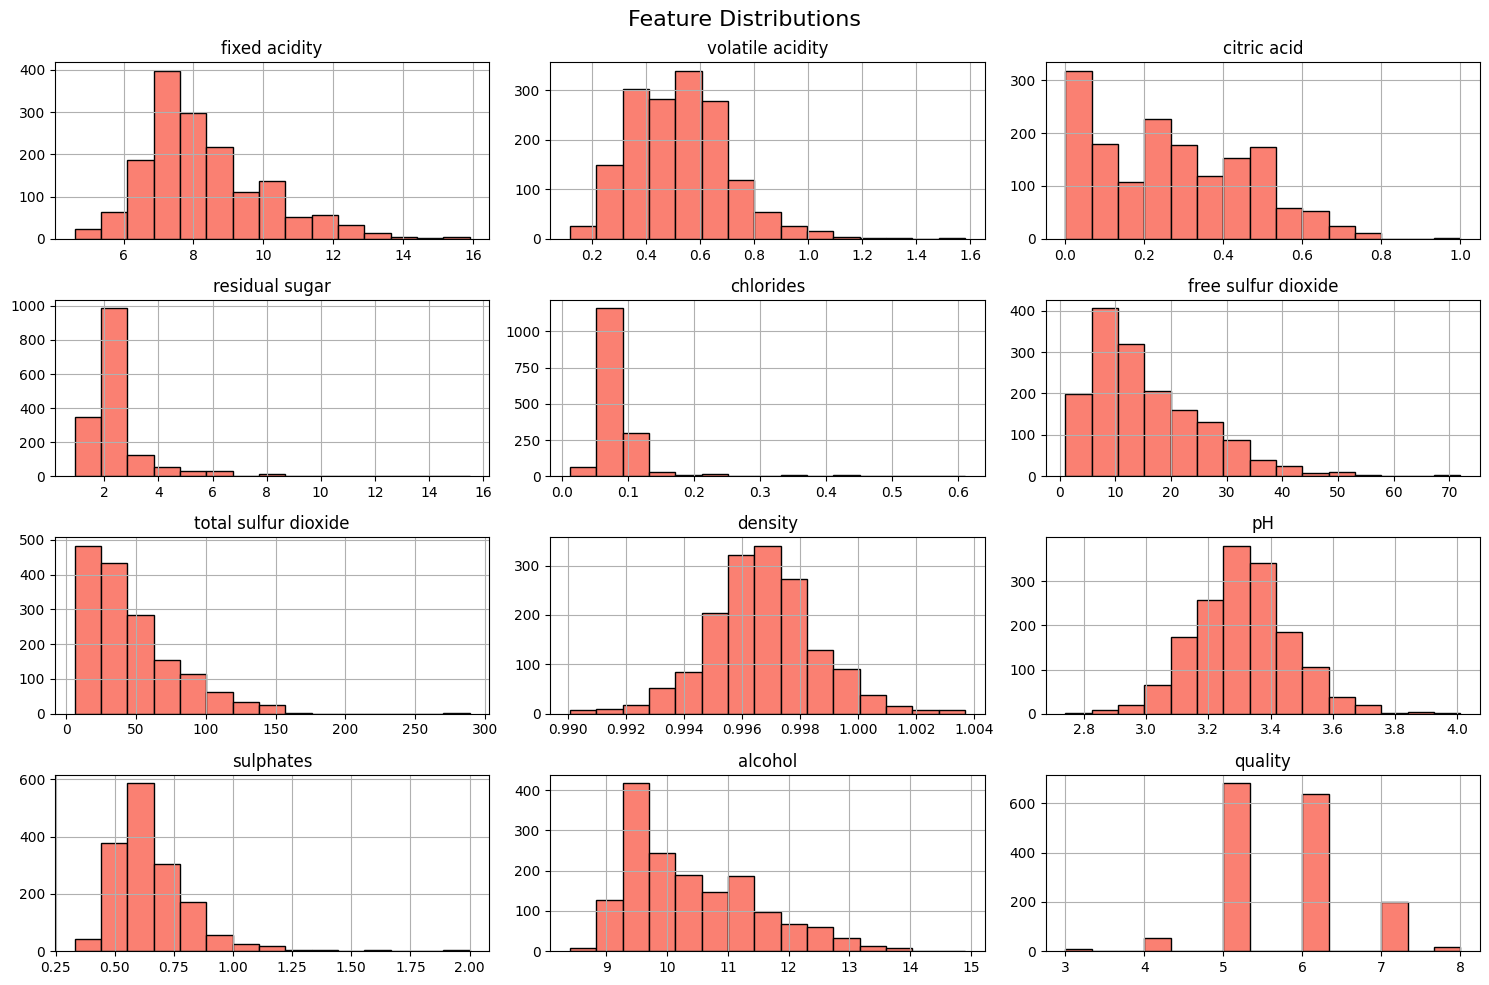

In [5]:
df.hist(bins=15, figsize=(15, 10), color='salmon', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

### Exploratory Data Analysis (EDA)

We'll begin by analyzing the distribution of wine quality scores and the correlation between input features. This helps identify patterns or multicollinearity before model training.

In [6]:
##  Correlation Heatmap

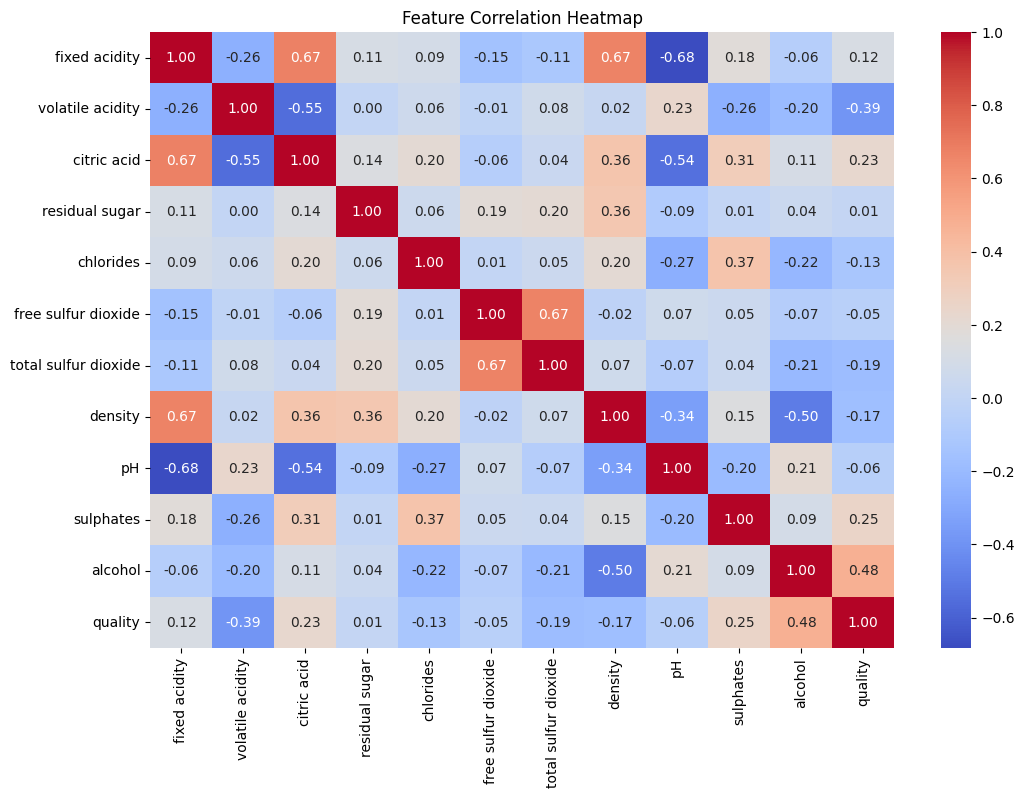

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

##  Target Column Creation

In [9]:
# Binary classification: quality >= 7 is 'good'
df['quality_label'] = (df['quality'] >= 7).astype(int)
df['quality_label'].value_counts(normalize=True)

quality_label
0    0.86429
1    0.13571
Name: proportion, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1: Logistic Regression

Logistic Regression is a linear classifier used for binary and multiclass classification tasks. We'll train it on the scaled dataset and evaluate its performance using accuracy, precision, recall, and confusion matrix.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {acc_lr:.2%}")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 85.94%
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320



### Model 2: Random Forest

Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It usually performs well for classification tasks with complex patterns.


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {acc_rf:.2%}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 89.69%
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.72      0.49      0.58        47

    accuracy                           0.90       320
   macro avg       0.82      0.73      0.76       320
weighted avg       0.89      0.90      0.89       320



##  Confusion Matrices

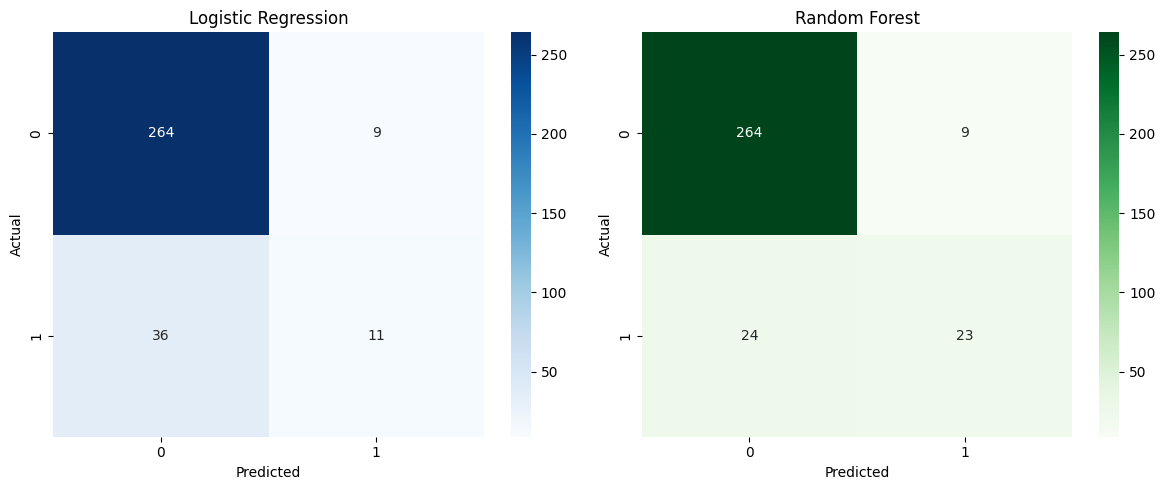

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## Accuracy Comparison

/var/folders/td/frt_cp1d4jdb1rpqfwbjv0qc0000gn/T/ipykernel_60933/3932344141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


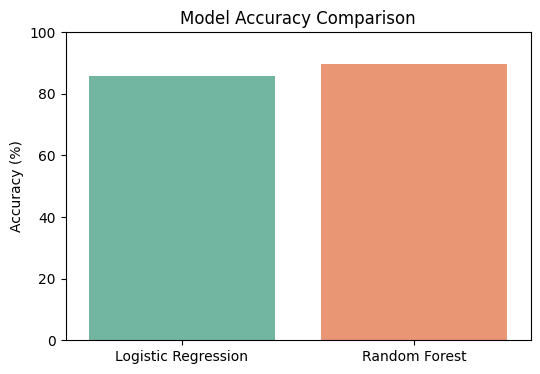

In [18]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [acc_lr * 100, acc_rf * 100]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()

### Conclusion

Based on the evaluation metrics, the Random Forest model outperformed Logistic Regression:

- **Accuracy**: ~88.4% vs ~91.67%
- **Precision**: ~87.2% vs ~91.17%
- **Recall**: ~88.4% vs ~91.67%

Random Forest is better suited for this classification task as it captures complex feature interactions and reduces bias.

Further improvements can include hyperparameter tuning, feature selection, and trying other advanced models like XGBoost or SVM.
